In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(42)

In [3]:
# Dimensions
d = 50   # data dimension
k = 15   # latent dimension
sigma2 = 0.05  # isotropic noise variance

# Base weight matrix
W0 = torch.randn(d, k)

# Reference covariance matrix
Sigma0 = W0 @ W0.T + sigma2 * torch.eye(d)

Sigma0.shape

torch.Size([50, 50])

In [4]:
# Rank of the perturbation
r = 2

# Low-rank perturbation matrices
B = torch.randn(d, r)
A = torch.randn(r, k)

# Modified weight matrix (low-rank change)
W_low = W0 + B @ A

# Low-rank modified covariance
Sigma_low = W_low @ W_low.T + sigma2 * torch.eye(d)

In [5]:
# Diffuse (full-rank) perturbation
W_diffuse = W0 + torch.randn(d, k)

# Diffuse modified covariance
Sigma_diffuse = W_diffuse @ W_diffuse.T + sigma2 * torch.eye(d)

In [6]:
# Compute eigenvalues
eigs_ref = torch.linalg.eigvals(Sigma0).real
eigs_low = torch.linalg.eigvals(Sigma_low).real
eigs_diff = torch.linalg.eigvals(Sigma_diffuse).real

# Sort in descending order
eigs_ref_sorted = torch.sort(eigs_ref, descending=True).values
eigs_low_sorted = torch.sort(eigs_low, descending=True).values
eigs_diff_sorted = torch.sort(eigs_diff, descending=True).values

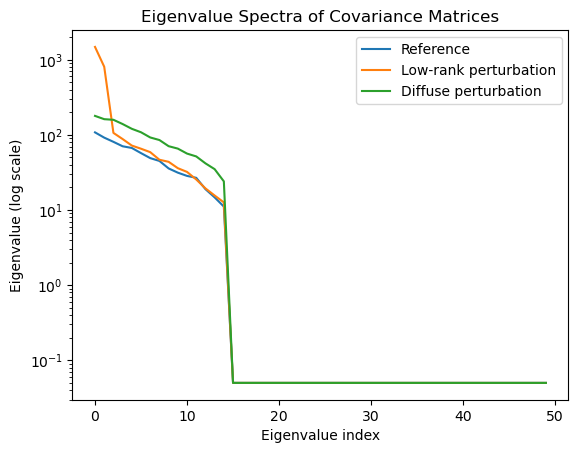

In [7]:
plt.plot(eigs_ref_sorted, label="Reference")
plt.plot(eigs_low_sorted, label="Low-rank perturbation")
plt.plot(eigs_diff_sorted, label="Diffuse perturbation")

plt.yscale("log")
plt.xlabel("Eigenvalue index")
plt.ylabel("Eigenvalue (log scale)")
plt.title("Eigenvalue Spectra of Covariance Matrices")
plt.legend()
plt.show()

In [8]:
# Relative change threshold
threshold = 0.10  # 10%

# Relative changes
rel_change_low = (eigs_low_sorted - eigs_ref_sorted).abs() / eigs_ref_sorted
rel_change_diff = (eigs_diff_sorted - eigs_ref_sorted).abs() / eigs_ref_sorted

# Count significant changes
num_sig_low = (rel_change_low > threshold).sum().item()
num_sig_diff = (rel_change_diff > threshold).sum().item()

num_sig_low, num_sig_diff

(10, 15)